# 1. Motivation
**What is your dataset?**

Our main dataset is New York Police Department's (NYPD) Motor Vehicle Collisions dataset from New York City Open Data. It provides details of motor vehicle collissions in the city with information on where and when they happend as well as which vehicles are involved in them and which factors have contributed to them. To supplement our main dataset with additional contextual information, we are also drawing on weather data from the National Oceanic and Atmospheric Administration and population data from New York City Open Data. The links to the datasets can be found below.   

- Link to data on vehicle collisions (NYC Open Data): https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95
- Link to data on weather conditions (National Oceanic and Atmospheric Administration): http://www.noaa.gov
- Link to data on New York City's population by boroughs (NYC Open Data): https://data.cityofnewyork.us/City-Government/New-York-City-Population-By-Boroughs/9mhd-na2n

**Why did you choose this/these particular datasets?**

The choice of data relies on a twofold answer. 

1. Vehicle accidents and traffic incidents are of political importance. According to the organisation 'Transportation Alternatives' and the U.S Department of Transportation, traffic accidents in New York City cost the city an estimated four billions dollars a year. The costs range from medical treatment to property damage and emergency service. On top of this, 229 persons were killed and around 42000 injured in the New York City traffic in 2016. Traffic accidents then have monetary as well as human costs, which bring forward questions of better traffic regulation and safety. This points to, at least we believe, the importance of investigating patterns in traffic accidents. If the city is to regulate better and make the traffic safer, then information on where and when accidents occur is necessary. Following this, we have chosen to pay particular interest to accidents causing injuries as we find this to be one of the more important steps if the local government is to target efficiently due to the human costs. With the help of data, we hope to see better regulation. With better regulation, we hope to see less people injured. This is the main motivation behind our final project, and our choice of this dataset as our main research concern.     

2. Technically, the dataset offers a good amount of data with a little over a million rows and is very granular. It is thus possible to track and trace each single accident and its context.  

**What was your goal for the end user's experience?**
Our goal has been to shed light on vehicle accidents causing injuries in NYC. It has been our ambition to raise awareness, stimulate curiousity, produce new hypothesis, and illustrate important patterns in relation to traffic safety. On our site, we have tried to target several subpublics within the greater public by allowing users to engage with our visualizations in different ways through details on demand. Apart from this, one of our goals have also been to raise questions for further exploration - questions which may not be answered best by the methods used in our process. Thus we have suggested the need for qualitative studies of specific traffic intersections, whether in the form of observation or video material, if one is to dive deeper into the factors contributing to injuries.  
In the end, it is our hope that the user leaves our site with a greater knowledge of vehicle accidents in NYC 

# 2. Basic statistics - understanding the data
**Write about your choices in data cleaning and preprocessing**

- Fjerne det der ikke har zipcode, vi fjerner missing værdier, når vi skal bruge zipcodes (fjerne rækker), ændre dataformaterne (reformaterer dem), vi konstruerer seperate datasæt (kun med injuries), 


**Write a short section that discusses the dataset stats.** 

Our main dataset is collected between July 2012 and April 2017. The size of the dataset is 225 mb. It has a litle over a million rows (1002838 to be specific), which each corresponds to a specific vehicle collision incident. Further, the dataset has 29 columns, each representing a variable. The dataset contain the following information:
- Temporal data: Information on when the accident took place. Access to year, month, weekday, and hour.
- Spatial data: Information on where the accident took place. Access to borough, zipcode, coordinates (latitude/longitude), and streetnames. 
- Damage data: Information on how many people were injured or killed in the dataset and if they were either pedestrians, cyclists or motorists. 
- Causes of incident: Information on the contributing factors to the accidents, why they took place. Examples are driver inattention, steering failure or driving under the influence of alcohol.   
- Type of Vehicle: Information on what type of vehicle were involved in the incident (station wagon, passenger vehicle).

Apart from the main dataset, secondary contextual datasets have been incorporated. This was necessary as the original dataset lacked several important components surrounding the context of the accidents. Most importantly, these were weather conditions (accident happen more frequently under specific weather conditions) and population information. The latter was chosen in order to monitor whether a high frequency of accidents in one area was simply the result of a high amount of people living there. The two supplementary dataset contain the following data: 
- Weather conditions: Information on temperature and precipitation on specific dates. 
- Population data: New York City's population by boroughs. 

Below, the code for the descriptive statistics is supplied.


In [13]:
#Importing libraries used for the data preparation
import pandas as pd
import numpy as np
import sys 
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import datetime as dt
from datetime import date
import geoplotlib
from geoplotlib.utils import read_csv, BoundingBox, DataAccessObject

df = pd.read_csv('traffic_data.csv')

For the website, we prepare datasets and files with the 25 locations with most accidents, and the 25 locations with most injuries. 

In [14]:
#Preparing data for plotting the top 25 places in NYC with the most accidents and the top 25 places with the most injuries
top_accidents = df['LOCATION'].value_counts(ascending=False)

top_accidents = pd.DataFrame(top_accidents)
top_accidents = top_accidents['LOCATION'][range(0,25)]
top_accidents = pd.DataFrame(top_accidents)

In [21]:
#Prepare the dataframe, and loop through to find the number of accidents with injuries, for the 25 places with most accidents
top_accidents = top_accidents.rename(columns = {'LOCATION':'ACCIDENTS'})
top_accidents['LOCATION'] = top_accidents.index
top_accidents['INJURIES'] = np.nan
top_accidents

coordinates = {}

for i,c in enumerate(top_accidents['LOCATION']):
    if i not in coordinates:
        coordinates[i] = 0
    for j,cc in enumerate(df['LOCATION']):
        if c == cc:
            coordinates[i] += int(int(df['NUMBER OF PERSONS INJURED'][j]) > 0)

top_accidents['INJURIES'] = coordinates.values()

In [22]:
#Output the dataframe with topinjuries to csv
top_accidents['INJURIES'].to_csv('topaccidentsinj.csv', index=False)

#Before this files is imported, it is enriched with data (road interection addresses from Google) 
top_25_samlet = pd.read_csv('./Project folder/TOP25_SAMLET_FIL.csv')

#Out file for d3 visualization on the website
top_25_samlet.to_json('top_25_samlet.json', orient='records')
print top_25_samlet

    ACCIDENTS  INJURIES        LON        LAT     RATIO  \
0         464       111 -73.890623  40.658578  0.239224   
1         309        99 -73.931120  40.668798  0.320388   
2         479        90 -73.896853  40.675736  0.187891   
3         405        89 -73.890675  40.820189  0.219753   
4         234        87 -74.020420  40.642058  0.371795   
5         338        82 -73.877428  40.680015  0.236311   
6         339        78 -73.897477  40.678163  0.230088   
7         258        76 -73.767353  40.656160  0.294574   
8         673        75 -73.984529  40.696035  0.111441   
9         366        75 -73.880793  40.857128  0.204918   
10        308        71 -73.962449  40.663183  0.230519   
11        231        71 -73.937420  40.804376  0.307359   
12        340        71 -73.873280  40.838012  0.208824   
13        485        68 -73.989792  40.757232  0.140206   
14        252        68 -73.891381  40.861701  0.269841   
15        272        68 -73.773828  40.659651  0.250000 

Below we supply the code for the heatmap on the website. On the heat map, only accidents with injuries are plotted.

In [18]:
#Preparing dataframe only with accidents resulting in injuries
df_injured = df[df['NUMBER OF PERSONS INJURED']!=0]
latstr = list(df_injured["LATITUDE"])
lonstr = list(df_injured["LONGITUDE"])
lat = [float(i) for i in latstr]
lon = [float(i) for i in lonstr]
geo_data = {"lat": lat, "lon": lon}   

In [19]:
#Heat map of NYC over ONLY ACCIDENTS WITH INJURIES
bbox1 = BoundingBox(north=40.917577, west=-74.259090, south=40.477399, east=-73.700272)
geoplotlib.set_bbox(bbox1)
geoplotlib.kde(geo_data, bw=2, cmap='hot_r', cut_below=1e-4)
geoplotlib.tiles_provider('toner-lite')
geoplotlib.inline()

('smallest non-zero count', 4.4777898101688105e-09)
('max count:', 7.9838061170993129)


Now, we will show the basic distributions of some of the fundamental variables in the data we use. As our project focuses on injuries, we create a dataset with the accidents that injured atleast one person.

In [25]:
#Dataset only with injuries
df_injured = df[df['NUMBER OF PERSONS INJURED']!=0]

In [26]:
#Create variables with information on time, year, month etc.
df_injured["DATETIME"] = pd.to_datetime(df_injured['DATE'])
df_injured['HOUR'] = df_injured['TIME'].str.split(":").str.get(0).astype(int)
df_injured['YEAR'] = df_injured['DATE'].str.split("/").str.get(2).astype(int)
df_injured['MONTH'] = df_injured['DATE'].str.split("/").str.get(0).astype(int)
df_injured['WEEKDAY'] = df_injured['DATETIME'].dt.dayofweek
#Don't mind the warnings below, they don't mean anything important. 

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas

Descriptive time statistics. How are injuries distributed across the the day, the week, the month and the year. 

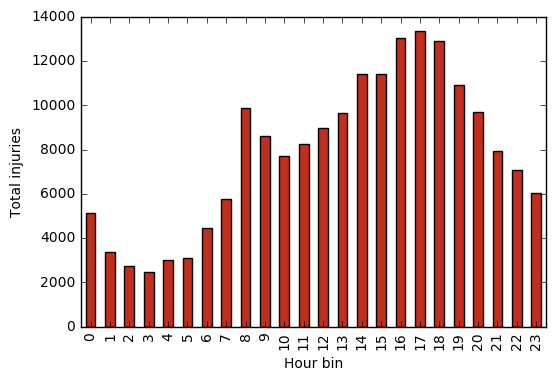

In [27]:
#Injuries per hour. Injury distribution across the day
injuries_count_hour = df_injured.HOUR.value_counts(sort=False)
injuries_count_hour.plot(kind='bar',color='#C02F1D')
plt.ylabel('Total injuries', fontsize=10)
plt.xlabel('Hour bin',fontsize=10)
plt.savefig('injuries_by_hour.png',bbox_inches='tight',dpi=300)
plt.show()

The figure above shows the distribution of injuries by hour. There seem to be some peaks in the rush hour periods between 08.00-10.00 and 16.00-19.00. These are the moments where people are either making their way to work og travelling back home. The amount of vehicles on the streets are then assumed to be higher which may explain the distribution of the peaks. 

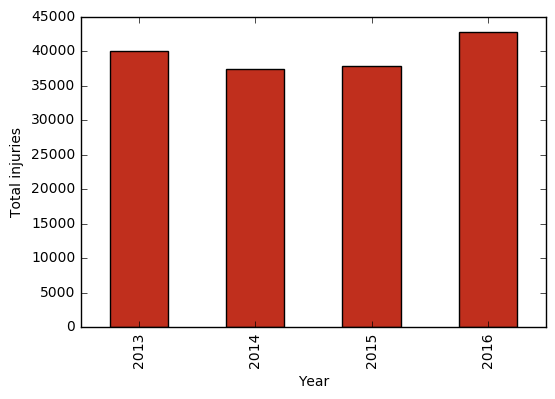

In [28]:
#Making a dataset only with injuries 2013-2016 (whole years)
df_years = df_injured[df_injured['YEAR'].isin([2013,2014,2015,2016])]

#Injuries per year. 
injuries_count_year = df_years.YEAR.value_counts(sort=False)
injuries_count_year.plot(kind='bar',color='#C02F1D')
plt.ylabel('Total injuries', fontsize=10)
plt.xlabel('Year',fontsize=10)
plt.show()

As the figure above shows, there has been a decrease in injuries between 2013 and 2014, but since 2015 there has been a rise in incidents. In 2016, around 42000 accidents caused at least one injury. There has thus been an increase in injuries by 6,8%. In 2013, the mayor of New York City, Bill de Blasio, launched the program ‘Vision Zero’ which was set to increase traffic safety on the streets. The effect of this has not yet been visible – quite the opposite. 

In [29]:
#Creating a dataset for plotting weekdays and total injuries (0-6 is monday - friday)
df_weekdays = pd.DataFrame(df_injured.WEEKDAY.value_counts())
df_weekdays['DAY']=df_weekdays.index
df_weekdays = df_weekdays.sort_index(inplace=False)
df_weekdays

,WEEKDAY,DAY
0,26742,0
1,27480,1
2,27337,2
3,27241,3
4,29279,4
5,25550,5
6,23348,6


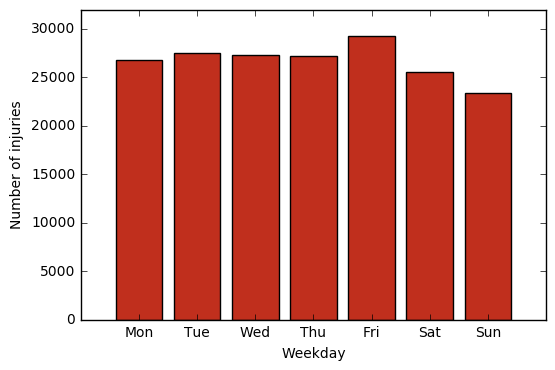

In [30]:
import pylab as plt


LABELS = ["Mon", "Tue", "Wed", "Thu","Fri","Sat",'Sun']

plt.bar(df_weekdays.DAY, df_weekdays.WEEKDAY, align='center', color='#C02F1D')
plt.xticks(df_weekdays.DAY, LABELS)
plt.ylabel("Number of injuries",fontsize=10)
plt.xlabel("Weekday",fontsize=10)
plt.ylim(0, 32000)
plt.savefig('injuries_by_weekday.png',bbox_inches='tight',dpi=300)
plt.show()

The figure above shows the distribution of injuries by weekday. There does not seem to be as large swings between the weekdays as between the hour bins, but a few trends can still be located. Friday is the day with the most injuries, whereas the weekends, and especially sunday, has less injuries. The decrease in injuries in the weekends may be due to less vehicles on the streets as many people have the day off.

In [31]:
#Injuries per month. Injury distribution across the months (1-12 is january - december). 
df_months = pd.DataFrame(df_injured.MONTH.value_counts())
df_months['MONTHLABEL']=df_months.index
df_months = df_months.sort_index(inplace=False)
df_months = df_months.reset_index(drop=True)
df_months

,MONTH,MONTHLABEL
0,14629,1
1,12790,2
2,14306,3
3,12632,4
4,14385,5
5,14106,6
6,17603,7
7,17670,8
8,17617,9
9,17894,10


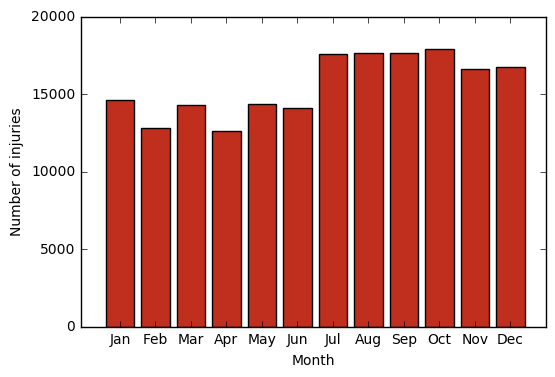

In [32]:
LABELS2 = ["Jan", "Feb", "Mar", "Apr","May","Jun",'Jul','Aug','Sep','Oct','Nov','Dec']
plt.bar(df_months.MONTHLABEL, df_months.MONTH, align='center', color='#C02F1D')
plt.xticks(df_months.MONTHLABEL, LABELS2)
plt.ylabel("Number of injuries",fontsize=10)
plt.xlabel("Month",fontsize=10)
plt.ylim(0, 20000)
plt.xlim(-0.1, 13)
plt.savefig('injuries_by_month.png',bbox_inches='tight',dpi=300)
plt.show()

The figure right above shows the distribution of injuries by month. We see a peak in the summer months, which may be due to an increase in tourists. We also see a decrease in injuries in the first half of the year as well as an increase in November and December. This may be due to bad weather conditions from e.g. snow or ice.

## Weather data

0.146108005717
0.115449175185
0.183369599295
0.452274333084
0.0599428871131


/home/troels/Software/pyenv/versions/2.7.12/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/troels/Software/pyenv/versions/2.7.12/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


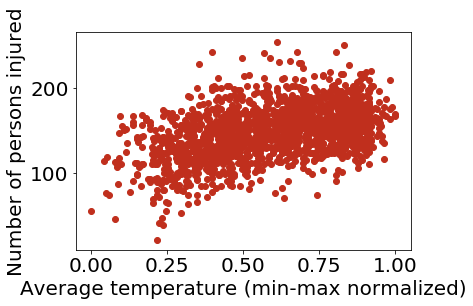

In [2]:
from __future__ import division

import cPickle
import numpy as np
import pandas
from sklearn import preprocessing
from sklearn.svm import SVC
from matplotlib import pyplot as plt

traffic_data_set = pandas.read_csv('traffic_data.csv')
traffic_data_set['DATETIME'] = pandas.to_datetime(traffic_data_set['DATE'])
traffic_data_set.to_csv('traffic_data_datetime.csv')

# group by date
aggregate_columns = [
    'NUMBER OF PERSONS INJURED',
    'NUMBER OF PERSONS KILLED',
    'NUMBER OF PEDESTRIANS INJURED',
    'NUMBER OF PEDESTRIANS KILLED',
    'NUMBER OF CYCLIST INJURED',
    'NUMBER OF CYCLIST KILLED',
    'NUMBER OF MOTORIST INJURED',
    'NUMBER OF MOTORIST KILLED',
]

aggregate_functions = {
    'NUMBER OF PERSONS INJURED': sum,
    'NUMBER OF PERSONS KILLED': sum,
    'NUMBER OF PEDESTRIANS INJURED': sum,
    'NUMBER OF PEDESTRIANS KILLED': sum,
    'NUMBER OF CYCLIST INJURED': sum,
    'NUMBER OF CYCLIST KILLED': sum,
    'NUMBER OF MOTORIST INJURED': sum,
    'NUMBER OF MOTORIST KILLED': sum
}

# Remove NaN's from the aggregation_columns
traffic_data_set = traffic_data_set.dropna(subset=aggregate_columns)

# Count number of accidents per date
traffic_data_set_accidents_per_date = pandas.DataFrame(
    traffic_data_set.groupby('DATETIME').size().rename('ACCIDENT COUNT'))
# Join datetime+accident-count with aggregation columns
traffic_data_set_accidents_per_date = traffic_data_set \
    .groupby('DATETIME') \
    .agg(aggregate_functions) \
    .join(traffic_data_set_accidents_per_date)

traffic_data_set_accidents_per_date.to_csv('traffic_data_datetime_aggregation.csv')

# add weather data

weather_data_set = pandas.read_csv('new_york_weather_data.csv')

weather_data_set['DATE'] = weather_data_set['DATE'].apply(lambda date: str(date))
weather_data_set['DATE'] = weather_data_set['DATE'].apply(lambda date: date[:4] + '-' + date[4:6] + '-' + date[6:8])
weather_data_set['DATETIME'] = pandas.to_datetime(weather_data_set['DATE'])

weather_data_set.to_csv('new_york_weather_data_datetime.csv')

weather_data_set = pandas.read_csv('new_york_weather_data_datetime.csv')
traffic_data = pandas.read_csv('traffic_data_datetime_aggregation.csv')

# PRCP = precipitation
# SNWD = snow depth data
# SNOW = snow fall centimeters?
# TAVG = temperature average (always -9999?)
# TMAX = temperature max
# TMIN = temperature min

weather_data_set = weather_data_set[[
    'DATETIME',
    'PRCP',
    'SNWD',
    'SNOW',
    'TAVG',
    'TMAX',
    'TMIN'
]].copy()

traffic_data = pandas.merge(
    traffic_data,
    weather_data_set,
    how='left',
    on=['DATETIME'],
    sort=False,
    copy=True,
    indicator=False
)

# PRCP	SNWD	SNOW	TAVG	TMAX	TMIN

traffic_data['PRCP'] = pandas.to_numeric(traffic_data['PRCP'])
traffic_data['SNWD'] = pandas.to_numeric(traffic_data['SNWD'])
traffic_data['SNOW'] = pandas.to_numeric(traffic_data['SNOW'])
traffic_data['TAVG'] = pandas.to_numeric(traffic_data['TAVG'])
traffic_data['TMAX'] = pandas.to_numeric(traffic_data['TMAX'])
traffic_data['TMIN'] = pandas.to_numeric(traffic_data['TMIN'])
traffic_data['ACCIDENT COUNT'] = pandas.to_numeric(traffic_data['ACCIDENT COUNT'])

traffic_data.to_csv('traffic_data_datetime_aggregation_weather.csv')

# find weather effects

# PRCP = precipitation
# SNWD = snow depth data
# SNOW = snow fall centimeters?
# TAVG = temperature average
# TMAX = temperature max
# TMIN = temperature min

traffic_data = pandas.read_csv('traffic_data_datetime_aggregation_weather.csv')

# calculate average
traffic_data['TAVG'] = map(lambda row: (row[15] + row[16]) / 2, traffic_data.values)

# normalize average temperature
traffic_data['TAVG'] = preprocessing \
    .MinMaxScaler() \
    .fit_transform(traffic_data['TAVG'].values)

correlation = traffic_data.corr('pearson')

print correlation['PRCP']['ACCIDENT COUNT']
print correlation['PRCP']['NUMBER OF PERSONS INJURED']

# http://www.rff.org/research/publications/how-climate-change-affects-traffic-accidents
# We see a pretty strong correlation between high average temperatures and number of persons injured

print correlation['TAVG']['ACCIDENT COUNT']
print correlation['TAVG']['NUMBER OF PERSONS INJURED']
print correlation['TAVG']['NUMBER OF PERSONS KILLED']

fig = plt.figure(None)
# We define a fake subplot that is in fact only the plot.
plot = fig.add_subplot(111)

# We change the fontsize of minor ticks label
plot.tick_params(axis='both', which='major', labelsize=20)
plot.tick_params(axis='both', which='minor', labelsize=20)

plt.xlabel('Average temperature (min-max normalized)', fontsize=20)
plt.ylabel('Number of persons injured', fontsize=20)
plt.plot(traffic_data['TAVG'], traffic_data['NUMBER OF PERSONS INJURED'], 'o', color='#C02F1D')

plt.show()

In the above plot we see the correlation between temperature and injuries. 
Dispite the spread there is a clear upwards trend in the number of persons injured when the temperature increases.

# 3. Theory and theoretical tools
**Describe which machine learning tools you use and why the tools you've chosen are right for the problem you're solving.**
**Talk about your model selection. How did you split the data in to test/training. Did you use cross validation?**

**Explain the model performance. How did you measure it? Are your results what you expected?**

We have used support vector machines (SVM), decision trees, and multivariate linear regression.

First we turn to:

In [3]:
traffic_data_set = pandas.read_csv('traffic_data_datetime.csv')

traffic_data_set = traffic_data_set.replace(r'^(\s+|)$', np.nan, regex=True)
traffic_data_set = traffic_data_set.dropna(subset=['ZIP CODE'])
traffic_data_set['ZIP CODE'] = pandas.to_numeric(traffic_data_set['ZIP CODE'], downcast='integer')

print len(traffic_data_set['ZIP CODE'])

traffic_data_set.to_csv('traffic_data_datetime_clean_zip.csv')

traffic_data = pandas.read_csv('traffic_data_datetime_clean_zip.csv')

# Map has_injured to boolean 0/1 depending on an injured occured in the given accident
traffic_data['HAS_INJURED'] = map(lambda x: 1 if int(x) > 0 else 0, traffic_data['NUMBER OF PERSONS INJURED'])

traffic_data.to_csv('traffic_data_has_injured_clean_zip.csv')

traffic_data = pandas.read_csv('traffic_data_has_injured_clean_zip.csv')

traffic_data['DATE_ENUM'] = map(lambda (k, v): k, enumerate(traffic_data['DATE']))
traffic_data['TIME_ENUM'] = map(lambda (k, v): k, enumerate(traffic_data['TIME']))

vehicle_types = pandas.get_dummies(
    traffic_data,
    prefix='VEHICLE_TYPE',
    prefix_sep='_',
    columns=[
        'VEHICLE TYPE CODE 1',
        # 'VEHICLE TYPE CODE 2',
        # 'VEHICLE TYPE CODE 3',
        # 'VEHICLE TYPE CODE 4',
        # 'VEHICLE TYPE CODE 5',
    ])

contributing_factor = pandas.get_dummies(
    traffic_data,
    prefix='CONTRIBUTING_FACTOR',
    prefix_sep='_',
    columns=[
        'CONTRIBUTING FACTOR VEHICLE 1',
        # 'CONTRIBUTING FACTOR VEHICLE 2',
        # 'CONTRIBUTING FACTOR VEHICLE 3',
        # 'CONTRIBUTING FACTOR VEHICLE 4',
        # 'CONTRIBUTING FACTOR VEHICLE 5'
    ])

boroughs = pandas.get_dummies(
    traffic_data,
    prefix='BOROUGH',
    prefix_sep='_',
    columns=[
        'BOROUGH'
    ])

traffic_data = pandas.merge(traffic_data, vehicle_types)
traffic_data = pandas.merge(traffic_data, contributing_factor)
traffic_data = pandas.merge(traffic_data, boroughs)

traffic_data.to_csv('traffic_data_has_injured_clean_zip_dummie_columns.csv')

# Add day of week
date_times = pandas.to_datetime(traffic_data['DATE'])
traffic_data['WEEK_DAY'] = date_times.dt.dayofweek
traffic_data['DATE_ENUM'] = map(lambda (k, v): k, enumerate(traffic_data['DATE']))
traffic_data['TIME_ENUM'] = map(lambda (k, v): k, enumerate(traffic_data['TIME']))

traffic_data['BOROUGH'] = traffic_data['BOROUGH'].fillna(0)
traffic_data['VEHICLE TYPE CODE 1'] = traffic_data['VEHICLE TYPE CODE 1'].fillna(0)
traffic_data['CONTRIBUTING FACTOR VEHICLE 1'] = traffic_data['CONTRIBUTING FACTOR VEHICLE 1'].fillna(0)

stacked_borough = traffic_data[['BOROUGH']].stack()
stacked_vehicle_type = traffic_data[['VEHICLE TYPE CODE 1']].stack()
stacked_contribution = traffic_data[['CONTRIBUTING FACTOR VEHICLE 1']].stack()

traffic_data['BOROUGH_enum'] = pandas.Series(stacked_borough.factorize()[0], index=stacked_borough.index).unstack()
traffic_data['VEHICLE_enum'] = pandas.Series(stacked_vehicle_type.factorize()[0], index=stacked_vehicle_type.index).unstack()
traffic_data['CONTRIBUTION_enum'] = pandas.Series(stacked_contribution.factorize()[0], index=stacked_contribution.index).unstack()

traffic_data['VEHICLE TYPE CODE 2'] = traffic_data['VEHICLE TYPE CODE 2'].fillna(0)
traffic_data['MULTIPLE_VEHICLES'] = traffic_data['VEHICLE TYPE CODE 2'] != 0

traffic_data['MULTIPLE_VEHICLES'] = traffic_data['VEHICLE TYPE CODE 2'] != 0

traffic_data.to_csv('traffic_data_has_injured_clean_zip_dummie_columns_day_of_week.csv')

# create 50/50 data set

traffic_data = pandas.read_csv('traffic_data_has_injured_clean_zip_dummie_columns_day_of_week.csv')

# get all accidents with injuries
traffic_data_injured = traffic_data[traffic_data['NUMBER OF PERSONS INJURED'] > 0]

# uniform sample equal number of uninjured
traffic_data_uninjured = traffic_data[traffic_data['NUMBER OF PERSONS INJURED'] == 0]
traffic_data_uninjured = traffic_data_uninjured.sample(n=len(traffic_data_injured))

traffic_data = pandas.concat([traffic_data_injured, traffic_data_uninjured], ignore_index=True)
traffic_data.to_csv('traffic_data_has_injured_clean_zip_dummie_columns_day_of_week_50-50.csv')

traffic_data = pandas.read_csv('traffic_data_has_injured_clean_zip_dummie_columns_day_of_week.csv')
traffic_data_50 = pandas.read_csv('traffic_data_has_injured_clean_zip_dummie_columns_day_of_week_50-50.csv')

# Perform training

# reduce data set to 100000 rows
print len(traffic_data)
traffic_data = traffic_data.sample(200000)

# select first 100000 as injuries data set
traffic_data_injuries = traffic_data.head(100000)

# select last 100000 as regular data set
traffic_data = traffic_data.tail(100000)

traffic_data_50 = traffic_data_50.sample(100000)

traffic_injuries_only = traffic_data_injuries[traffic_data_injuries['NUMBER OF PERSONS INJURED'] > 0]

# select train and test set
train, validate, test = np.split(traffic_data.sample(frac=1), [int(.8*len(traffic_data)), int(.9*len(traffic_data))])
_, validate_injuries, test_injuries = np.split(traffic_injuries_only.sample(frac=1), [int(.8 * len(traffic_injuries_only)), int(.9 * len(traffic_injuries_only))])
_, validate_50, test_50 = np.split(traffic_data_50.sample(frac=1), [int(.8 * len(traffic_data_50)), int(.9 * len(traffic_data_50))])

print train.shape, validate.shape, test.shape

dummie_columns = [
    'BOROUGH_enum',
    'VEHICLE_enum',
    'CONTRIBUTION_enum',
    'MULTIPLE_VEHICLES',
    'WEEK_DAY',
    'TIME_ENUM',
    'DATE_ENUM',
    'ZIP CODE',
]

print dummie_columns
print len(dummie_columns)

train_predictors = train[dummie_columns]
train_targets = train['HAS_INJURED']

test_predictors = test[dummie_columns]
test_targets = test['HAS_INJURED']

validate_predictors = validate[dummie_columns]
validate_targets = validate['HAS_INJURED']

test_injuries_predictors = test_injuries[dummie_columns]
test_injuries_targets = test_injuries['HAS_INJURED']

validate_injuries_predictors = validate_injuries[dummie_columns]
validate_injuries_targets = validate_injuries['HAS_INJURED']

test_50_predictors = test_50[dummie_columns]
test_50_targets = test_50['HAS_INJURED']

validate_50_predictors = validate_50[dummie_columns]
validate_50_targets = validate_50['HAS_INJURED']

estimator = SVC(C=1, kernel='rbf', gamma=0.001)
estimator.fit(train_predictors, train_targets)

print "Train"
print estimator.score(train_predictors, train_targets)

print "Test"
print estimator.score(test_predictors, test_targets)

print "Validation"
print estimator.score(validate_predictors, validate_targets)

print "Test 50/50"
print estimator.score(test_50_predictors, test_50_targets)

print "Validation 50/50"
print estimator.score(validate_50_predictors, validate_50_targets)

print "Only injuries test"
print estimator.score(test_injuries_predictors, test_injuries_targets)

print "Only injuries validation"
print estimator.score(validate_injuries_predictors, validate_injuries_targets)


/home/troels/Software/pyenv/versions/2.7.12/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


737651


/home/troels/Software/pyenv/versions/2.7.12/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (24,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/troels/Software/pyenv/versions/2.7.12/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (25,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/troels/Software/pyenv/versions/2.7.12/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (26,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


737651
(80000, 112) (10000, 112) (10000, 112)
['BOROUGH_enum', 'VEHICLE_enum', 'CONTRIBUTION_enum', 'MULTIPLE_VEHICLES', 'WEEK_DAY', 'TIME_ENUM', 'DATE_ENUM', 'ZIP CODE']
8
Train
0.9326125
Test
0.8028
Validation
0.801
Test 50/50
0.5362
Validation 50/50
0.5314
Only injuries test
0.0187366167024
Only injuries validation
0.0230192719486



### Regression analysis – Relationship between the number of injured and the cause of accident

By applying multivariate linear regression to the data, we seek to illuminate cause and effect relationships between the cause of an accident, and how many people the accident injured (Grus 2015:173). The original dataset from NYC Open Data contains a nominal variable with information on the cause of each accident.

Since the categories are mutually exclusive, we split the nominal variable into dummy variables, one variable for each cause. The variables now hold a 1, if the given cause was the cause of the accident and 0 if not (Grus 2015:179). By estimating the regression model with all the dummies included, except one, which is used as category of reference, we can compare the magnitude of the parameter coefficients for the dummies. Thus we obtain information on, which causes are the most dangerous, in terms of injuring humans, which can be used in the future to decide which causes are most important to reduce.

In [1]:
#Importing libraries used for the data preparation for the regression analysis
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import datetime as dt
from datetime import date
import geoplotlib
from geoplotlib.utils import read_csv, BoundingBox, DataAccessObject

df = pd.read_csv('traffic_data.csv')

//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
#Renaming the column which contains injuries, since the statsmodels library won't accept input with space in the name
df['NUMBER OF PERSONS INJURED'] = df['NUMBER OF PERSONS INJURED'].astype(int)
df['INJURED'] = df['NUMBER OF PERSONS INJURED']

#CREATE DUMMIES FOR CONTRIBUTING FACTORS
df = pd.get_dummies(df, columns=['CONTRIBUTING FACTOR VEHICLE 1'])

#CREATE DUMMIES FOR VEHICLE TYPE
df = pd.get_dummies(df, columns=['VEHICLE TYPE CODE 1'])

#CREATE DUMMIES FOR BOROUGHS
df = pd.get_dummies(df, columns=['BOROUGH'])

In [3]:
#RENMAMING CONTRIBUTING FACTOR DUMMY-VARIABLES FOR THE MULTIVARIAT REGRESSION
df=df.rename(columns = {'CONTRIBUTING FACTOR VEHICLE 1_Unsafe Speed':'Unsafe_Speed'})
df=df.rename(columns = {'CONTRIBUTING FACTOR VEHICLE 1_Driver Inattention/Distraction':'Driver_Inattention_Distraction'})
df=df.rename(columns = {'CONTRIBUTING FACTOR VEHICLE 1_Failure to Yield Right-of-Way':'Failure_to_Yield_Right_of_Way'})
df=df.rename(columns = {'CONTRIBUTING FACTOR VEHICLE 1_Other Vehicular':'Other_Vehicular'})
df=df.rename(columns = {'CONTRIBUTING FACTOR VEHICLE 1_Fatigued/Drowsy':'Fatigued_Drowsy'})
df=df.rename(columns = {'CONTRIBUTING FACTOR VEHICLE 1_Passenger Distraction':'Passenger_Distraction'})
df=df.rename(columns = {'CONTRIBUTING FACTOR VEHICLE 1_Backing Unsafely':'Backing_Unsafely'})
df=df.rename(columns = {'CONTRIBUTING FACTOR VEHICLE 1_Physical Disability':'Physical_Disability'})
df=df.rename(columns = {'CONTRIBUTING FACTOR VEHICLE 1_Traffic Control Disregarded':'Traffic_Control_Disregarded'})
df=df.rename(columns = {'CONTRIBUTING FACTOR VEHICLE 1_Prescription Medication':'Prescription_Medication'})
df=df.rename(columns = {'CONTRIBUTING FACTOR VEHICLE 1_Turning Improperly':'Turning_Improperly'})
df=df.rename(columns = {'CONTRIBUTING FACTOR VEHICLE 1_Lost Consciousness':'Lost_Consciousness'})
df=df.rename(columns = {'CONTRIBUTING FACTOR VEHICLE 1_Driver Inexperience':'Driver_Inexperience'})
df=df.rename(columns = {'CONTRIBUTING FACTOR VEHICLE 1_Alcohol Involvement':'Alcohol_Involvement'})
df=df.rename(columns = {'CONTRIBUTING FACTOR VEHICLE 1_Outside Car Distraction':'Outside_Car_Distraction'})
df=df.rename(columns = {'CONTRIBUTING FACTOR VEHICLE 1_Pavement Slippery':'Pavement_Slippery'})
df=df.rename(columns = {'CONTRIBUTING FACTOR VEHICLE 1_Illness':'Illness'})
df=df.rename(columns = {'CONTRIBUTING FACTOR VEHICLE 1_Following Too Closely':'Following_Too_Closely'})
df=df.rename(columns = {'CONTRIBUTING FACTOR VEHICLE 1_View Obstructed/Limited':'View_Obstructed_Limited'})
df=df.rename(columns = {'CONTRIBUTING FACTOR VEHICLE 1_Aggressive Driving/Road Rage':'Aggressive_Driving_Road_Rage'})
df=df.rename(columns = {'CONTRIBUTING FACTOR VEHICLE 1_Pedestrian/Bicyclist/Other Pedestrian Error/Confusion':'Pedestrian_Bicyclist_Other_Pedestrian_Error'})
df=df.rename(columns = {'CONTRIBUTING FACTOR VEHICLE 1_Other Electronic Device':'Other_Electronic_Device'})
df=df.rename(columns = {'CONTRIBUTING FACTOR VEHICLE 1_Brakes Defective':'Brakes_Defective'})
df=df.rename(columns = {'CONTRIBUTING FACTOR VEHICLE 1_Oversized Vehicle':'Oversized_Vehicle'})
df=df.rename(columns = {'CONTRIBUTING FACTOR VEHICLE 1_Glare':'Glare'})
df=df.rename(columns = {'CONTRIBUTING FACTOR VEHICLE 1_Passing or Lane Usage Improper':'Passing_or_Lane_Usage_Improper'})
df=df.rename(columns = {'CONTRIBUTING FACTOR VEHICLE 1_Unsafe Lane Changing':'Unsafe_Lane_Changing'})
df=df.rename(columns = {'CONTRIBUTING FACTOR VEHICLE 1_Reaction to Other Uninvolved Vehicle':'Reaction_to_Other_Uninvolved_Vehicle'})
df=df.rename(columns = {'CONTRIBUTING FACTOR VEHICLE 1_Fell Asleep':'Fell_Asleep'})
df=df.rename(columns = {'CONTRIBUTING FACTOR VEHICLE 1_Failure to Keep Right':'Failure_to_Keep_Right'})
df=df.rename(columns = {'CONTRIBUTING FACTOR VEHICLE 1_Pavement Defective':'Pavement_Defective'})
df=df.rename(columns = {'CONTRIBUTING FACTOR VEHICLE 1_Obstruction/Debris':'Obstruction_Debris'})
df=df.rename(columns = {'CONTRIBUTING FACTOR VEHICLE 1_Traffic Control Device Improper/Non-Working':'Traffic_Control_Device_Improper_Non_Working'})
df=df.rename(columns = {'CONTRIBUTING FACTOR VEHICLE 1_Drugs (Illegal)':'Drugs_Illegal'})
df=df.rename(columns = {'CONTRIBUTING FACTOR VEHICLE 1_Accelerator Defective':'Accelerator_Defective'})
df=df.rename(columns = {'CONTRIBUTING FACTOR VEHICLE 1_Steering Failure':'Steering_Failure'})
df=df.rename(columns = {'CONTRIBUTING FACTOR VEHICLE 1_Tire Failure/Inadequate':'Tire_Failure_Inadequate'})
df=df.rename(columns = {'CONTRIBUTING FACTOR VEHICLE 1_Cell Phone (hand-held)':'Cell_Phone_hand_held'})
df=df.rename(columns = {'CONTRIBUTING FACTOR VEHICLE 1_Cell Phone (hands-free)':'Cell_Phone_hands_free'})
df=df.rename(columns = {'CONTRIBUTING FACTOR VEHICLE 1_Lane Marking Improper/Inadequate':'Lane_Marking_Improper_Inadequate'})
df=df.rename(columns = {'CONTRIBUTING FACTOR VEHICLE 1_Driverless/Runaway Vehicle':'Driverless_Runaway_Vehicle'})
df=df.rename(columns = {'CONTRIBUTING FACTOR VEHICLE 1_Headlights Defective':'Headlights_Defective'})
df=df.rename(columns = {'CONTRIBUTING FACTOR VEHICLE 1_Windshield Inadequate':'Windshield_Inadequate'})
df=df.rename(columns = {'CONTRIBUTING FACTOR VEHICLE 1_Other Lighting Defects':'Other_Lighting_Defects'})
df=df.rename(columns = {'CONTRIBUTING FACTOR VEHICLE 1_Tow Hitch Defective':'Tow_Hitch_Defective'})
df=df.rename(columns = {'CONTRIBUTING FACTOR VEHICLE 1_Animals Action':'Animals_Action'})
df=df.rename(columns = {'CONTRIBUTING FACTOR VEHICLE 1_Shoulders Defective/Improper':'Shoulders_Defective_Improper'})

In [4]:
#RENMAMING VEHICLE TYPE DUMMY-VARIABLES FOR THE MULTIVARIAT REGRESSION
df=df.rename(columns = {'VEHICLE TYPE CODE 1_PASSENGER VEHICLE':'PASSENGER_VEHICLE'})
df=df.rename(columns = {'VEHICLE TYPE CODE 1_SPORT UTILITY / STATION WAGON':'SPORT_UTILITY_STATION_WAGON'})
df=df.rename(columns = {'VEHICLE TYPE CODE 1_TAXI':'TAXI'})
df=df.rename(columns = {'VEHICLE TYPE CODE 1_VAN':'VAN'})
df=df.rename(columns = {'VEHICLE TYPE CODE 1_OTHER':'OTHER'})
df=df.rename(columns = {'VEHICLE TYPE CODE 1_PICK-UP TRUCK':'PICK_UP_TRUCK'})
df=df.rename(columns = {'VEHICLE TYPE CODE 1_SMALL COM VEH(4 TIRES) ':'SMALL_COM_VEH_4_TIRES'})
df=df.rename(columns = {'VEHICLE TYPE CODE 1_LARGE COM VEH(6 OR MORE TIRES)':'LARGE_COM_VEH_6_OR_MORE_TIRES'})
df=df.rename(columns = {'VEHICLE TYPE CODE 1_LIVERY VEHICLE':'LIVERY_VEHICLE'})
df=df.rename(columns = {'VEHICLE TYPE CODE 1_MOTORCYCLE':'MOTORCYCLE'})
df=df.rename(columns = {'VEHICLE TYPE CODE 1_AMBULANCE':'AMBULANCE'})
df=df.rename(columns = {'VEHICLE TYPE CODE 1_BICYCLE':'BICYCLE'})
df=df.rename(columns = {'VEHICLE TYPE CODE 1_FIRE TRUCK':'FIRE_TRUCK'})
df=df.rename(columns = {'VEHICLE TYPE CODE 1_SCOOTER':'SCOOTER'})
df=df.rename(columns = {'VEHICLE TYPE CODE 1_PEDICAB':'PEDICAB'})
df=df.rename(columns = {'VEHICLE TYPE CODE 1_BUS':'BUS'})

In [5]:
#RENAMING BOROUGH DUMMY_VARIABLES FOR THE MULTIVARIAT REGRESSION
df=df.rename(columns = {'BOROUGH_MANHATTAN':'MANHATTAN'})
df=df.rename(columns = {'BOROUGH_BROOKLYN':'BROOKLYN'})
df=df.rename(columns = {'BOROUGH_QUEENS':'QUEENS'})
df=df.rename(columns = {'BOROUGH_BRONX':'BRONX'})
df=df.rename(columns = {'BOROUGH_STATEN ISLAND':'STATEN_ISLAND'})

A few things must be noted before showing the regression results. In about 50 pct. of the accidents, the data does not have information on the exact cause of the accident, which leaves us with 527,017 accidents with ’Unspecified’ cause. We have no way to know, whether the accidents with ‘Unspecified’ as cause, are completely random. In other words, it might be some special cases in which cause is unavailable for some reason, or the police didn’t spent as much time on identifying the cause, or the cause was harder to decide. This might cause bias, but there isn’t much be can do about it (Grus 2015:180)

Unspecified is used as the category of reference in the regression. Thus the intercept of the model measures the average number of injured persons in accidents with an unspecified cause of accident. For each dummy variable, the associated parameter coefficient must be added to the intercept, in order to obtain the estimated average number of people injured for each type of cause.

Another important thing to note is, that the original variable containing information on cause is called “Contributing Factor Vehicle 1”. Thus it only measures the contributing factor for the first vehicle, if more vehicles were involved in the accident. Therefore, a dummy variable measuring whether multiple vehicles were involved in the accident or not, is included. If this variable is not included, it might cause bias, as it will remain in the model’s error term, and could be correlated with the cause of the accident. This is plausible, that some types of accidents may be more common when multiple cars are involved, e.g. “Following Too Closely”. The multiple vehicles dummy ensures, that the effect of multiple vehicles on number of injures, is separated from the effect of cause, on the number of people injured in an accident. 

In [6]:
#CREATE VARIABLE THAT MEASURES WHETHER MULTIPLE VEHICLES WERE INVOLVED IN THE ACCIDENT
df['Multiple_Vehicles'] = df['CONTRIBUTING FACTOR VEHICLE 2'].fillna(0)
df.loc[df['Multiple_Vehicles'] != 0, 'Multiple_Vehicles'] = 1

In the regression model, alongside multiple vehicles, we’ve controlled for vehicle type and boroughs. This is done in order to isolate the effect of the cause of the accidents, and thus interpret the coefficients as “all else being equal” causal effects (Grus 2015:182). We use heteroskedasticity robust standard errors, which are robust to any form of unobserved heteroscedasticity in the model. That is, when the variance of the error term is correlated with one or more of the explanatory variables (Woolridge 2013:259ff).

For the regression, we did not split the data into test and training data, as we are not interested in exact predictions, but merely the relationship between the causes of accidents, and the number of people injured.

Now for model estimation:

In [7]:
#FITTING AND PRINTING THE TABLE FOR THE MULTIVARIATE REGRESSION MODEL
injured_regression = sm.ols(formula='INJURED ~  Multiple_Vehicles + Unsafe_Speed + Driver_Inattention_Distraction + Failure_to_Yield_Right_of_Way + Other_Vehicular + Fatigued_Drowsy + Passenger_Distraction + Backing_Unsafely + Physical_Disability + Traffic_Control_Disregarded + Prescription_Medication + Turning_Improperly + Lost_Consciousness + Driver_Inexperience + Alcohol_Involvement + Outside_Car_Distraction + Pavement_Slippery + Illness + Following_Too_Closely + View_Obstructed_Limited + Aggressive_Driving_Road_Rage + Pedestrian_Bicyclist_Other_Pedestrian_Error + Other_Electronic_Device + Brakes_Defective + Oversized_Vehicle + Glare + Passing_or_Lane_Usage_Improper + Unsafe_Lane_Changing + Reaction_to_Other_Uninvolved_Vehicle + Fell_Asleep + Failure_to_Keep_Right + Pavement_Defective + Obstruction_Debris + Traffic_Control_Device_Improper_Non_Working + Drugs_Illegal + Accelerator_Defective + Steering_Failure + Tire_Failure_Inadequate + Cell_Phone_hand_held + Cell_Phone_hands_free + Lane_Marking_Improper_Inadequate + Driverless_Runaway_Vehicle + Headlights_Defective + Windshield_Inadequate + Other_Lighting_Defects + Tow_Hitch_Defective + Animals_Action + Shoulders_Defective_Improper + PASSENGER_VEHICLE + SPORT_UTILITY_STATION_WAGON + TAXI + VAN + OTHER + PICK_UP_TRUCK + SMALL_COM_VEH_4_TIRES + LARGE_COM_VEH_6_OR_MORE_TIRES + LIVERY_VEHICLE + MOTORCYCLE + AMBULANCE + BICYCLE + FIRE_TRUCK + SCOOTER + PEDICAB + BUS + MANHATTAN + BROOKLYN + QUEENS + BRONX + STATEN_ISLAND', data=df).fit(cov_type='HC1', use_t=True)
print injured_regression.summary()

                            OLS Regression Results                            
Dep. Variable:                INJURED   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     922.1
Date:                Tue, 09 May 2017   Prob (F-statistic):               0.00
Time:                        12:33:08   Log-Likelihood:            -9.7510e+05
No. Observations:             1002838   AIC:                         1.950e+06
Df Residuals:                 1002768   BIC:                         1.951e+06
Df Model:                          69                                         
Covariance Type:                  HC1                                         
                                                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------

The most surprising finding of the regression model is, that accidents with multiple vehicles involved on average cause less injured people than solo accidents. We expected that accidents with multiple vehicles would have the potential to injure more persons, and we expected the coefficient on the "Multiple Vehicles" variable to reflect that. The finding might reflect that when multiple vehicles are involved, drivers of all the involved cars are protected inside their vehicle. Solo accidents might hurt "soft" pedestrians, who are not protected inside their cars. 

For more comments on the effects of the causes of accidents, check out the website. 

The following code prepares the data for the d3 visulizations on the website. We pull out the coeffiecients for the 10 most common causes of accidents, and create a new dataset with causes as observations (rows) and a column for total numbers of accidents caused by each cause and alongside a column for the coefficient from the regression for each cause. Then we create a third column that is the result of the number of total accidents multiplied onto the number the effect. Thus we can analyze the different causes and plot their importance in a barplot on the website

In [9]:
#Pull the regressions parameters for the causes out of the table
injured_cause_effects = injured_regression.params[range(2,49)]
injured_cause_effects = injured_cause_effects.sort_index()

#Count the number of accidents for each cause
df_original = pd.read_csv('traffic_data.csv')
injured_cause_numbers = df_original['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

injured_cause_numbers = injured_cause_numbers[range(1,len(injured_cause_numbers))]

injured_cause_numbers = injured_cause_numbers.sort_index() 

injured_cause_numbers = [int(i) for i in injured_cause_numbers] 

#Add numbers and parameters in a dataframe
injured_effects_and_numbers = pd.DataFrame(injured_cause_effects)
injured_effects_and_numbers[1] = injured_cause_numbers
injured_effects_and_numbers = injured_effects_and_numbers.rename(columns={0:'Effect',1:'Number'})

In [10]:
#Add the intercept to the parameters to obtain the "true" effect of the causes
injured_effects_and_numbers['Effect'] += injured_regression.params[0]

#Create an importance column which is the effect multiplied of cause multiplied by the number of cause
injured_effects_and_numbers['Importance'] = injured_effects_and_numbers['Effect'] * injured_effects_and_numbers['Number']

In [12]:
#Plotting the effects and numbers in a barplot USING ONLY THE TEN MOST COMMON CAUSES
injured_effects_and_numbers_sorted_numbers = injured_effects_and_numbers.sort(['Number'],ascending=True)
injured_effects_and_numbers_sorted_numbers = injured_effects_and_numbers_sorted_numbers[len(injured_effects_and_numbers_sorted_numbers)-10:]

injured_effects_and_numbers_sorted_effects = injured_effects_and_numbers.sort(['Effect'],ascending=True)

injured_effects_and_numbers_sorted_importance = injured_effects_and_numbers.sort(['Importance'],ascending=True)

#Preparing the data to be plotted in d3 on the website. We choose the ten most common causes of accicents and their effects and the importance, which is effect multiplied by number
injured_effects_and_numbers_sorted_numbers['Cause'] = injured_effects_and_numbers_sorted_numbers.index
regression_for_d3 = injured_effects_and_numbers_sorted_numbers.sort(['Importance'], ascending=True)
regression_for_d3 = regression_for_d3.round(2)

#Output data for visualization in d3 for the website
regression_for_d3.to_json('regression_data_true.json', orient='records')
print regression_for_d3

                                Effect  Number  Importance  \
Driver_Inexperience               0.55   12110     6707.93   
Prescription_Medication           0.54   15890     8583.86   
Lost_Consciousness                0.46   20089     9302.66   
Traffic_Control_Disregarded       0.87   12456    10864.39   
Turning_Improperly                0.48   24110    11659.39   
Backing_Unsafely                  0.43   28506    12129.69   
Other_Vehicular                   0.53   30717    16344.53   
Fatigued_Drowsy                   0.60   48260    28970.05   
Failure_to_Yield_Right_of_Way     0.70   43729    30606.72   
Driver_Inattention_Distraction    0.58  130397    75544.83   

                                                         Cause  
Driver_Inexperience                        Driver_Inexperience  
Prescription_Medication                Prescription_Medication  
Lost_Consciousness                          Lost_Consciousness  
Traffic_Control_Disregarded        Traffic_Control_Disreg

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


# 4. Visualizations
**Explain the visualizations you've chosen.**

We're working with three different kinds of visualizations on the site: Scatterplots, geomaps (in the form of a heatmaps and dot/point maps) and more ordinary barcharts. The visualizations and their design has been chosen due to some specific considerations. Some are common for them all, some for the specific visualizations. 

First of all, an important reflection has been about the audience. If visualizations are partly about communicating results (Healy & Moody 2014:106; Murray 2013:1), problems arise when a visual is perceived differently by an audience from the intent of the creator (Rougier et al. 2014:1). Because of this, we identified our audience as non-scientific readers early on, and designed our visualizations informed by this intent. However, designing for a more general public may be a tricky case as Rougier et al. (2014:1) points out: It demands simple figures that reveal only the most salient parts of the findings. It was thus important for us to design simple graphs that did not contain overwhelming and complex information on academic intrinsic ratios or parametres, but rather sought to express relatively simple patterns in a clear and clean way. 

   Secondly, we wanted some of our visualizations to be interactive, allowing the audience to toggle between different years and hover their mouses over specific datapoints to get details on demand. This is because we want to make the data open to different audiences within the general public (Murray 2013:3), and encourage engagement with the topic through the allowance of exploration. The latter seems easier when the images are interactive rather than static.    
  
  Thirdly, and more briefly, all of the chosen visualizations were chosen with specific questions and messages in mind. We found that some encodings helped visualizing interesting patterns in the data better than others. Implicit in these considerations was a balance between the readability of the visualizations and inclusion of their complexity (Venturini 2010:803). A good graph seem to be one which is loyal to the complexity of data while being able to communicate this in a clear and clean manner.   
  
As noted, we designed scatterplots, geomaps and barcharts for our website. Why these encodings? 
- **Scatterplots** were chosen to illustrate the development of accidents and injuries across the period 2013-2016. We found the visualization to be good at communicating the difference across the years, as it was easy to follow the movement of one point to another place in the graph when toggling. It is possible to toggle between the years and hover one's mouse over the datapoints to gain access to specific details. The scatterplots were thus designed with details-on-demand in mind. We chose to keep the axes of the scatterplot constant in order to secure comparison and allow the user to visually understand the yearly changes. 
 
- **Geomaps** were used mainly for explorative purposes. They were chosen to visualize which intersections in New York City have the most accidents and injuries. We thus found it good at approaching the question of 'where injuries most frequently take place'. We used three distinct colors to represent what was going on in the specific locations. It was also possible for the reader to acquire extra details by hovering the mouse over the datapoints. In the databoxes, we included the addresses of the points, thus making it possible for the reader to go on google street view to explore the intersection in question further. Our geomaps were designed with specific color contrasts in mind in order to make the findings stand out (e.g. red/yellow/orange on black). Although our geomaps have mostly been explorative, they have also been explanatory: It seems difficult to seperate the two tasks of visualization in practice sometimes.   

- **Barcharts** were used for explorative and explanatory reasons. We used it to give the user a sense of some fundamental distributions concerning time and place of the injuries. This was more explorative. We also used it for reporting some of the more salient features of our multiple regression analysis. This was more explanatory - we wanted to communicate some concrete results - although we also allowed exploration and details on demand by making the barchart interactive.    

**Why are they right for the story you want to tell?**

We found our visualizations to be right for our questions and purposes as they were good at creating overview of specific parametres (place, time, relevant factors). They served as good tools for illustrating some of the finds of our exploratory data approach, and tell a good story of the data. To take an example, on the page with the geomaps, we 'zoomed' in with the heatmap, which later lead us to produce the 'top 25' maps, which then became a reference point for the choice of a specific intersection to look into. 


# 5. Discussion
**What went well?**

Overall, we found our exploratory approach to the data to be successfull. We started out with next to no knowledge on traffic accidents in NYC, and ended up with an understanding of when injuries tend to happen more freqeuently (as illustrated in the descriptive statistics), where they happen most often (as shown with the geomaps), and which factors are of significant importance (shown with the multiple regression and binary classifiers). Our aim was to shed some light on whether there exist any patterns in the traffic accident dataset, and we found this to be the case. Despite this, not every pattern have been surprising. To take an example, it was not shocking that we found that injuries tend to happen more frequently in the rush hour periods. However, we also found several interesting patterns. Our geographical analysis pointed out how the intersections causing many injuries are not always the injuries with the most accidents. Some places are thus more dangerous to humans. Also, based on our regression analysis, solo accidents are more likely to cause an injury than one with multiple vehicles, which may seem a bit counter-intuitive at first.    
All in all, we had some interesting finds, and how localized some areas, which would be interesting to look into further in another study. 

**What is still missing? What could be improved? Why?**

Several things are still missing and improvable. We'll point to a few areas that need light shedding. 

**1. Data problems**. In the dataset, we found a large amount of missing values related to specific variables such as 'vehicle type' and 'contributing factor'. There is thus a lack of information on why these accidents are happening. This, we believe, cause instances of unprecision and insecurity as we either refrain from trying to explain what goes on in specific intersections or attemp hypothetical guesses.

**2. Qualitative assessments**. As a consequence of the first argument, it could be interesting to see qualitative studies of the intersections causing injuries which we have pointed to in this study. This may be done through observation studies or the monitoring of video material. This will give a deeper understanding of the circumstances surrounding the injuries we believe.    

**3. Contextual information**: So far, we've pointed to a few research designs that can illustrate other aspects of the traffic safety environment in NYC. We would also like to highlight some extra variables or datasets that may increase the accuracy of our estimats and improve our models. These are mostly contextual. It could thus be interesting to see how factors such as road conditions and speed limits correlate with injuries. Personal data on the persons involved in the accidents could also be informative as well as some more detailed descriptions of the vehicles. On our site, we merely touched the surface concerning weather conditions as a source for contextual data. It could be interesting to see how more detailed weather datasets would correlate with accidents.  

**4. Machine Learning**: As a last point, we would like to discuss potentials for machine learning. First of all, with the dataset, we had a difficult time finding out exactly what to predict: Location? Time of the day? We ended up predicting whether an accident caused an injury or not. This scenario is, however, a bit arbitrary as it is unclear whether the emergency agencies already know if there is an injury when the accident is reported. Secondly, in the case of obtaining a better accuracy of our models, there is still much that can be done and improved. As we argued above, several variables and features should be added to the dataset. This rise in dimensionality could, we hope, lead to more grounded models with an higher accuracy. Thirdly, following the former, there is a need for more quantitative variables, which may also increase the accuracy of our predictions. Many of the variables in the dataset are qualitative - these may succesfully be supplemented by more quantitative variables.  


# Bibliography
Grus, Joel (2015): Data Science from Scratch. Sebastopol: O'Reilly Media. 

Healy, K., & Moody, J. (2014): Data Visualization in Sociology. Annual Review of Sociology, 40, 105-128.

Murray, Scott (2013): Interactive Data Visualization for the Web. Sebastopol: O'Reilly Media. 

Rougier NP, Droettboom M, Bourne PE (2014): Ten Simple Rules for Better Figures. PLoS Comput Biol 10(9): e1003833. doi:10.1371/journal.pcbi.1003833

Woolridge, Jeffrey M (2013): Introductory Econometrics: A Modern Approach. 5th. South-Western Cengage Learning. 